In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
# Get the data
import os
path_to_data = r"C:\Users\Tucke\Desktop\Santander_Regression_Problem_Decision_Tree\santander-customer-transaction-prediction"
for file in os.listdir(path_to_data):
    if 'test' in file:
        test_df = pd.read_csv(os.path.join(path_to_data, file))
    elif 'train' in file:
        train_df = pd.read_csv(os.path.join(path_to_data, file))
    elif 'sample_submission' in file:
        submission_df = pd.read_csv(os.path.join(path_to_data, file))

In [5]:
train_df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [6]:
test_df

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [10]:
train_df.groupby('target').size()


target
0    179902
1     20098
dtype: int64

In [14]:
event_rate = 20098/179902
print(var * 100, '% event rate')

11.17163789174106 % event rate


In [24]:
# Split the training data into training and validation sets
# In this case we will use 20% as the validation set
var_cols = [c for c in train_df.columns if c not in ['ID_code', 'target']]
x = train_df.loc[:, var_cols]
y = train_df.loc[:, 'target']


# Use sklearn model selection to split the data into training and validation
# # sets for both x and y data sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((160000, 200), (40000, 200), (160000,), (40000,))

In [26]:
# Use a the sklearn DecisionTreeClassifier to with 8 leaf nodes and balanced
# Setting class_weight to adjust weights automatically based on input values y
# as inversely proportional to class frequency, example equation, where np.bincount
# returns and array of the count of each numerical occurence in a list
# Exanmple Equation: n_samples / (n_classes * np.bincount(y))
model_tree = DecisionTreeClassifier(max_leaf_nodes=8, class_weight='balanced')
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=8)

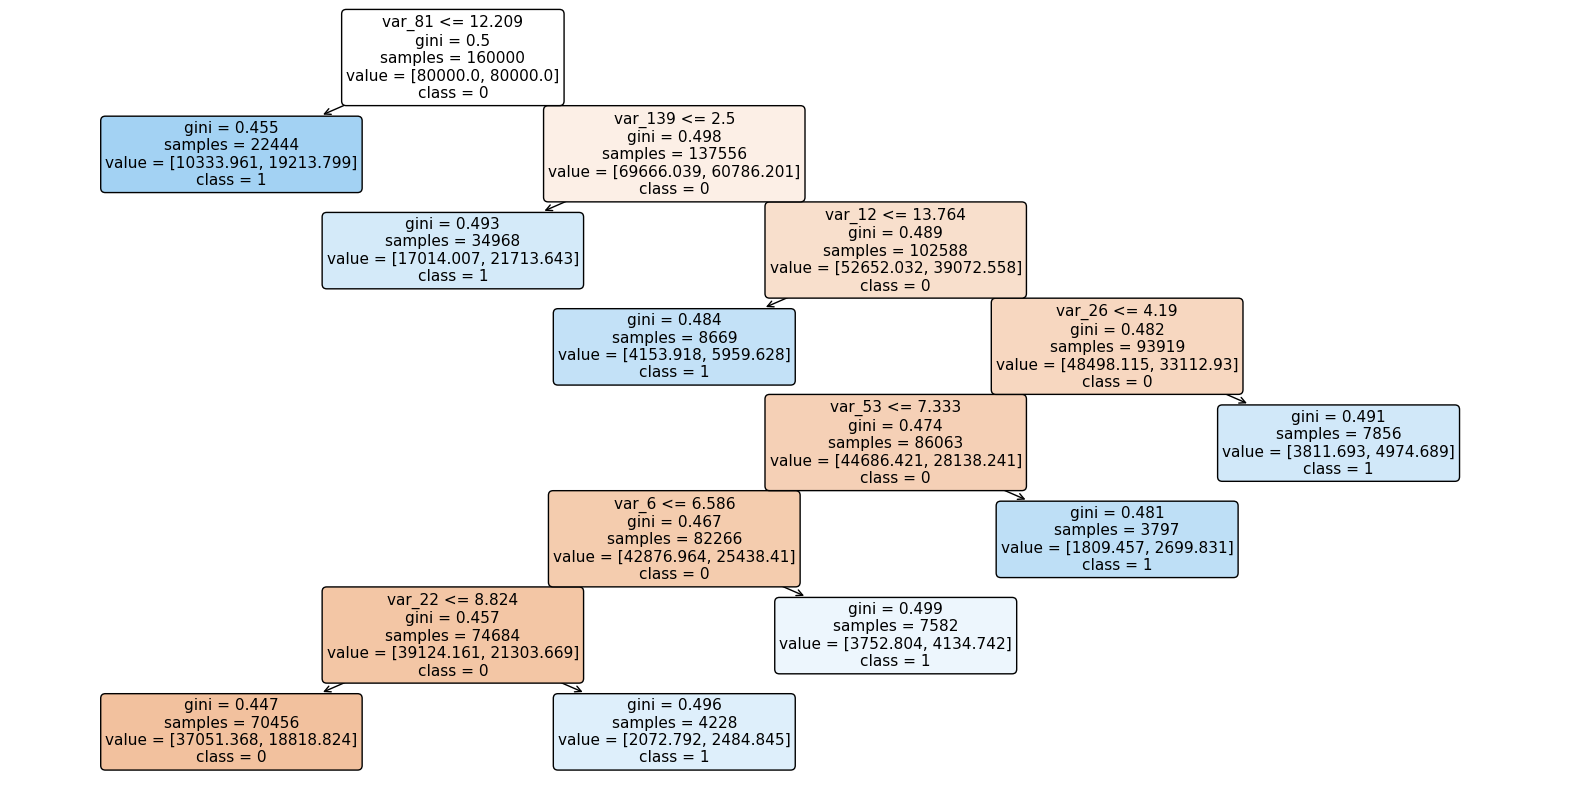

In [32]:
# Create a figure and set its size
plt.figure(figsize=(20, 10))

# Create the tree plot
plot_tree(model_tree, 
          feature_names = var_cols,
          class_names = ["0", "1"],
          rounded = True,
          filled = True
         )

plt.show()

In [33]:
# Test the model on the x_training data set and x_valid dataset
y_train_pred = model_tree.predict(x_train)
y_valid_pred = model_tree.predict(x_valid)

In [36]:
# Run area under the curve score from sklearn metrics, we call the method
# roc_auc_score on the output from the model_tree.predict method in prev cell.
# roc_auc_score requires two 1d arrays as inputs.
auc_train = metrics.roc_auc_score(y_train, y_train_pred)
auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)

# Print out training statistics 61.4% confidence on Train data set, 60.77% confidence
# on validation
print("AUC Train = {}\nAUC Valid = {}".format(round(auc_train, 4), round(auc_valid, 4)))

AUC Train = 0.614
AUC Valid = 0.6077


In [50]:
# Now write a function to iterate over a all of the leaf nodes 
# in order to determine the appropriate depth of the decision tree

def test_tree(max_leaf_nodes, x_train, y_train, x_valid, y_valid):
    model_tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, class_weight='balanced')
    model_tree.fit(x_train, y_train)
    
    y_train_pred = model_tree.predict(x_train)
    y_valid_pred = model_tree.predict(x_valid)
    
    auc_train = metrics.roc_auc_score(y_train, y_train_pred)
    auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)
    
    print("Nodes: {}, Train:{:.4f}, Valid:{:.4f}, Diff:{:.4f}".format(max_leaf_nodes,
                                                                     auc_train,
                                                                     auc_valid,
                                                                     auc_train-auc_valid))
    


In [51]:
# run a few iterations to find which max_tree_nodes works best

for i in range(2, 20):
    test_tree(i, x_train, y_train, x_valid, y_valid)

Nodes: 2, Train:0.5555, Valid:0.551546793450753:.4f, Diff:0.0040
Nodes: 3, Train:0.5849, Valid:0.5874321034687129:.4f, Diff:-0.0026
Nodes: 4, Train:0.5962, Valid:0.5986824389756114:.4f, Diff:-0.0025
Nodes: 5, Train:0.6034, Valid:0.6045937508334348:.4f, Diff:-0.0012
Nodes: 6, Train:0.6090, Valid:0.6089968427187102:.4f, Diff:-0.0000
Nodes: 7, Train:0.6114, Valid:0.6060384164635938:.4f, Diff:0.0053
Nodes: 8, Train:0.6140, Valid:0.6077430814570197:.4f, Diff:0.0062
Nodes: 9, Train:0.6153, Valid:0.608761664118567:.4f, Diff:0.0066
Nodes: 10, Train:0.6153, Valid:0.608761664118567:.4f, Diff:0.0066
Nodes: 11, Train:0.6170, Valid:0.6084043940133733:.4f, Diff:0.0086
Nodes: 12, Train:0.6170, Valid:0.6084043940133733:.4f, Diff:0.0086
Nodes: 13, Train:0.6170, Valid:0.6084043940133733:.4f, Diff:0.0086
Nodes: 14, Train:0.6170, Valid:0.6084043940133733:.4f, Diff:0.0086
Nodes: 15, Train:0.6182, Valid:0.6025625306643669:.4f, Diff:0.0157
Nodes: 16, Train:0.6182, Valid:0.6025625306643669:.4f, Diff:0.0157
No

In [57]:
# We could also perform k-fold cross validation by initializing a kfold object
# we set the number of folds equal to 5 and shuffle to shuffle the data
# before going into batches, and pass the int 1 for reproducable output across
# multiple functions calls as we are trying to do with our test_tree function.
kfold = KFold(5, shuffle=True, random_state=1)

# Now
for idx_train, idx_valid in kfold.split(train_df):
    x_train = train_df.loc[idx_train, var_cols]
    y_train = train_df.loc[idx_train, "target"]
    
    x_valid = train_df.loc[idx_valid, var_cols]
    y_valid = train_df.loc[idx_valid, 'target']
    
    # Start with testing 14 runs
    print("Iteration Starting\n------------------------")
    for i in range(2, 16):
        test_tree(i, x_train, y_train, x_valid, y_valid)
    print("Iteration Ended\n---------------------------")
    
    

Iteration Starts
Nodes: 2, Train:0.5551, Valid:0.5548048845815793:.4f, Diff:0.0003
Nodes: 3, Train:0.5856, Valid:0.5821097464406777:.4f, Diff:0.0035
Nodes: 4, Train:0.5963, Valid:0.5896271987086:.4f, Diff:0.0067
Nodes: 5, Train:0.6031, Valid:0.5963060371443551:.4f, Diff:0.0068
Nodes: 6, Train:0.6069, Valid:0.5988911261025873:.4f, Diff:0.0080
Nodes: 7, Train:0.6069, Valid:0.5988911261025873:.4f, Diff:0.0080
Nodes: 8, Train:0.6069, Valid:0.5988911261025873:.4f, Diff:0.0080
Nodes: 9, Train:0.6096, Valid:0.6016733536216099:.4f, Diff:0.0079
Nodes: 10, Train:0.6118, Valid:0.601437600869581:.4f, Diff:0.0103
Nodes: 11, Train:0.6118, Valid:0.601437600869581:.4f, Diff:0.0103
Nodes: 12, Train:0.6118, Valid:0.601437600869581:.4f, Diff:0.0103
Nodes: 13, Train:0.6118, Valid:0.601437600869581:.4f, Diff:0.0103
Nodes: 14, Train:0.6181, Valid:0.6075911712894666:.4f, Diff:0.0105
Nodes: 15, Train:0.6181, Valid:0.6075911712894666:.4f, Diff:0.0105
Iteration Ended
---------------------------
Iteration Starts

In [64]:
# Create a cv_roc_auc_scorer function to test how well the 

def cv_roc_auc_scorer(model, x, y): 
    return metrics.roc_auc_score(y, model.predict(x))



In [67]:
for leaf_node in range(2, 16):
    model_tree = DecisionTreeClassifier(max_leaf_nodes=leaf_node, class_weight='balanced')
    kfold_scores = cross_validate(model_tree,
                                 x,
                                 y,
                                 cv=5,
                                 scoring=cv_roc_auc_scorer,
                                 return_train_score=True 
                                 )
    # Find average train and test score
    train_auc_avg = np.mean(kfold_scores['train_score'])
    test_auc_avg = np.mean(kfold_scores['test_score'])


    print("Nodes:{}, Train:{:.4f}, Valid:{:.4f}, Diff:{:.4f}".format(leaf_node,
                                                                    train_auc_avg,
                                                                    test_auc_avg,
                                                                    train_auc_avg-test_auc_avg))


Nodes:2, Train:0.5548, Valid:0.5534, Diff:0.0014
Nodes:3, Train:0.5849, Valid:0.5805, Diff:0.0044
Nodes:4, Train:0.5963, Valid:0.5927, Diff:0.0036
Nodes:5, Train:0.6032, Valid:0.5992, Diff:0.0041
Nodes:6, Train:0.6065, Valid:0.6016, Diff:0.0049
Nodes:7, Train:0.6079, Valid:0.6026, Diff:0.0053
Nodes:8, Train:0.6084, Valid:0.6031, Diff:0.0052
Nodes:9, Train:0.6084, Valid:0.6031, Diff:0.0052
Nodes:10, Train:0.6093, Valid:0.6025, Diff:0.0068
Nodes:11, Train:0.6094, Valid:0.6024, Diff:0.0069
Nodes:12, Train:0.6123, Valid:0.6047, Diff:0.0076
Nodes:13, Train:0.6136, Valid:0.6062, Diff:0.0074
Nodes:14, Train:0.6144, Valid:0.6061, Diff:0.0083
Nodes:15, Train:0.6168, Valid:0.6083, Diff:0.0085


In [68]:
# We decide upon 8 leaf nodes based on the cross_validate
# Now lets test a DecisionTreeClassifier with 8 leaf nodes on the 
# entire x, y datasets
model_tree = DecisionTreeClassifier(max_leaf_nodes=8, class_weight='balanced')
model_tree.fit(x, y)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=8)

In [69]:
# Now lets plot the final decision tree
plt.figure(figsize=(20, 10))

plot_tree(model_tree,
         feature_names = var_cols,
         class_names =  ['0'. '1'],
         rounded=True,
         filled=True 
         )
plt.show()

SyntaxError: invalid syntax (792443702.py, line 6)

In [ ]:
# We need to find the final area under the curve value for the training data
# we can do this by predicting the x data and storing the roc_curve return
# in false positive rate(fpr) and true positive rate (tpr)
# Threshold is Decreasing thresholds on the decision function used to compute fpr and tpr. 
# thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.
y_pred = model_tree.predict(x)

fpr, tpr, thresh = metrics.roc_curve(y, y_pred)
metrics.auc(fpr, tpr)

In [ ]:
# Now plot the receiver operating characterisitic area under curve
zeros_probs = [0 for _ in range(len(y))]
fpr_zeros, tpr_zeros, _ = metrics.roc_curve(y, zeros_probs)

# Plot the roc curve for the model
plt.plot(fpr_zeros, tpr_zeros, linestyle='--', label'No Model)
plt.plot(fpr, tpr, marker='.', label='Model')
         
# Axis lables
plt.xlabel('False Positive Rate')
plt.ylable('True Positive Rate')
         
# Add Legend
plt.legend()
         
plt.show()

In [ ]:
# Final step find predictions for test data and store as excel file
test_df

In [ ]:
x_test = test_df.loc[:, var_cols]
y_test_pred = model_tree.predict(x_test)


In [ ]:
submission_df

In [ ]:
submission_dfon_df['target'] = y_test_pred
submission_df

In [ ]:
output_dir = r'C:\Users\Tucke\Desktop\Santander_Regression_Problem_Decision_Tree\santander-customer-transaction-prediction\Prediction_Test1.csv'
submission_df.to_csv(output_dir)